# 자연어처리 , NLP(Natural Language Processing)

### 육아휴직관련 법안 대한민국 국회 제 1809890호 의안 ¶


In [1]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib notebook

In [4]:
!pip install wordcloud

In [35]:
from konlpy.corpus import kobill  # 법안 있나?
from konlpy.tag    import Twitter
from konlpy.tag    import Okt  # 위의 Twitter과 같은 기능-> 오류 메시지 없어저짐

from wordcloud     import WordCloud, STOPWORDS
from PIL import Image

import nltk

In [6]:
# 육아 휴직 관련 법안
files_ko= kobill.fileids()
doc_ko=kobill.open('1809890.txt').read()

In [33]:
print(doc_ko)

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이사철․여상규․안규백

황영철․박영아․김정훈

김학송 의원(10인)

제안이유 및 주요내용

  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요

한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 

수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 

자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 

이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.

  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려

는 것임(안 제63조제2항제4호).

- 1 -

법률  제        호

지방공무원법 일부개정법률안

지방공무원법 일부를 다음과 같이 개정한다.

제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 

8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”

로 한다.

부      칙

이 법은 공포한 날부터 시행한다.

- 3 -

신 ·구조문대비표

현      행

개   정   안

제63조(휴직) ① (생  략)

제63조(휴직) ① (현행과 같음)

  ② 공무원이 다음 각 호의 어

  ② -------------------------

느 하나에 해당하는 사유로 휴

----------------------------

직을 원하면 임용권자는 휴직

----------------------------

을 명할 수 있다. 다만, 제4호

-------------.---------------

의 경우에는 대통령령으로 정

----------------------------

하는 특별한 사정이 없으면 휴

----------------------------

직을 명하여야 한다.

--------------.

  1. ∼ 3.

In [9]:
#type, 길이 확인
type(doc_ko), len(doc_ko)

(str, 4201)

In [14]:
twitter = Twitter()

# 명사만 추출
tokens_ko = twitter.nouns(doc_ko)
len(tokens_ko), tokens_ko[:10]

(735, ['지방공무원법', '일부', '개정', '법률', '안', '정의화', '의원', '대표', '발의', '의'])

In [38]:
# 위의 text 값을 매핑시키기

ko = nltk.Text(tokens_ko, name = '대한민국 국회 의안 제 1809890호')

print('token length:', len(ko.tokens))  # 전제
print('unique token:', len(set(ko.tokens)))  # 중복 제거


token length: 735
unique token: 250


In [39]:
# 빈도수 확인 
ko.vocab()

FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

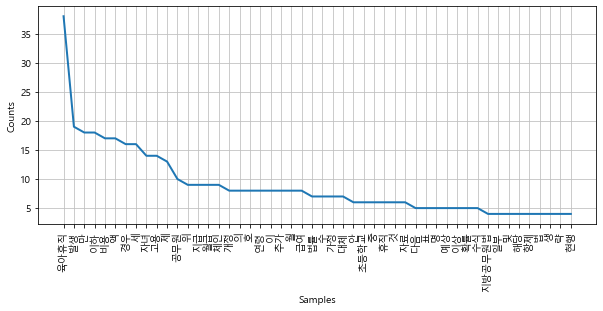

In [42]:
# ko 빈도수로 그래프 그리기
plt.figure(figsize = (10, 4))
ko.plot(50)
plt.show()

In [61]:
# stop_words를 어떻게 뽑지?
# 빈도수는 높지만 의미없는 값 제거-> 워드클라우드에서 크게 보이게 하기 위해서
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]

len(ko), ko[:10]

(681, ['지방공무원법', '일부', '개정', '법률', '정의화', '의원', '대표', '발의', '발의', '연월일'])

In [68]:
print(ko[:10])
ko = nltk.Text(ko, name = '대한민국 국회의안 제 1809890호')
print(ko[:10])

type(ko)  
# nltk의 클래스를 상속받아서,  그 클래스가 갖고 있는 다양한 메소드를 사용할 수 있음.
# ko.bocab 등

['지방공무원법', '일부', '개정', '법률', '정의화', '의원', '대표', '발의', '발의', '연월일']
['지방공무원법', '일부', '개정', '법률', '정의화', '의원', '대표', '발의', '발의', '연월일']


nltk.text.Text

['지방공무원법', '일부', '개정', '법률', '정의화', '의원', '대표', '발의', '발의', '연월일']
['지방공무원법', '일부', '개정', '법률', '정의화', '의원', '대표', '발의', '발의', '연월일']


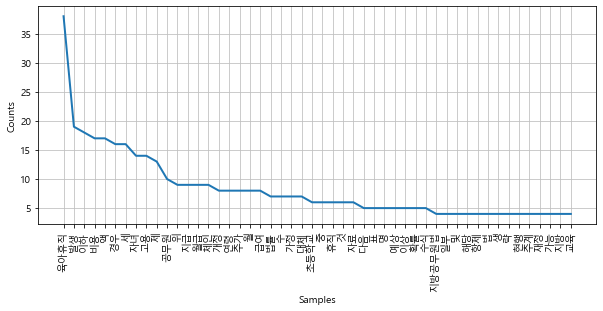

In [65]:
plt.figure(figsize=(10,4))
ko.plot(50)
plt.show()

In [45]:
# 특정 단어의 빈도 수 확인
ko.count('초등학교')

6

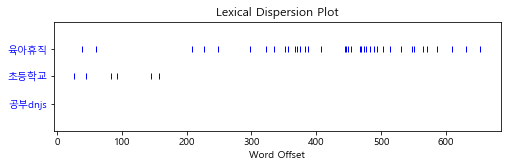

In [47]:
# 전체의 문장 구성에서 언급되는 단어의 분포, 위치를 보여주는 플랏 그래프
plt.figure(figsize = (8,2))
ko.dispersion_plot(['육아휴직','초등학교','공부dnjs'])

In [48]:
# 일치하는 단어 찾기
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


In [54]:
import nltk
nltk.download('stopwords')  # 사용하지 않는 단어 dwonload

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SeoulIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
# stopwords에 있는 값을 제거하고 난 후의 값 갖고오기
ko.collocations()

# 연관괸 단어들을 묶어주기

ValueError: too many values to unpack (expected 2)

In [60]:
ko.collocations(num=5, window_size=3)


ValueError: too many values to unpack (expected 2)